In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [84]:
# 1. DATA LOADING AND INITIAL EXPLORATION

df = pd.read_csv("/content/Sales_Business.csv")

print("=== DATASET OVERVIEW ===")
print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== COLUMN INFORMATION ===")
print(df.info())

=== DATASET OVERVIEW ===
Dataset Shape: (12120, 32)
Memory Usage: 12.04 MB

=== COLUMN INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            12120 non-null  object 
 1   date                12120 non-null  object 
 2   customer_id         12120 non-null  object 
 3   customer_age        11514 non-null  float64
 4   customer_gender     11741 non-null  object 
 5   customer_segment    12120 non-null  object 
 6   product_category    12120 non-null  object 
 7   product_name        12120 non-null  object 
 8   unit_price          12120 non-null  float64
 9   quantity            12120 non-null  int64  
 10  subtotal            12120 non-null  float64
 11  discount_rate       12120 non-null  float64
 12  discount_amount     12120 non-null  float64
 13  tax_rate            12120 non-null  float64
 14 

In [85]:
print("=== 2. DATA QUALITY ASSESSMENT ===")

# Missing values analysis
missing_data = pd.DataFrame({
'Column': df.columns,
'Missing_Count': df.isnull().sum(),
'Missing_Percentage': round((df.isnull().sum() / len(df))*100,2),
'Data_Type': df.dtypes
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
missing_data = missing_data.reset_index(drop=True)

# Duplicate analysis
duplicates = df.duplicated().sum()
print(f"\nDUPLICATE ROWS IN THE TOTAL DF: {duplicates} ({duplicates/len(df)*100:.2f}%)")

# Unique values per column
print("\n\nUNIQUE VALUES PER COLUMN:\n")
for col in df.columns:
  unique_count = df[col].nunique()
  print(f"{col}: {unique_count}")

print("\n\nMISSING VALUES:\n")
missing_data

=== 2. DATA QUALITY ASSESSMENT ===

DUPLICATE ROWS IN THE TOTAL DF: 120 (0.99%)


UNIQUE VALUES PER COLUMN:

order_id: 11995
date: 1823
customer_id: 11192
customer_age: 62
customer_gender: 3
customer_segment: 4
product_category: 8
product_name: 10679
unit_price: 9344
quantity: 17
subtotal: 10032
discount_rate: 1457
discount_amount: 2328
tax_rate: 5
tax_amount: 5008
shipping_cost: 1263
total_amount: 10230
sales_channel: 5
payment_method: 6
region: 5
sales_rep: 11121
lead_source: 7
is_returned: 2
return_reason: 5
satisfaction_score: 8
year: 5
month: 12
quarter: 4
day_of_week: 7
is_weekend: 2
profit_margin: 12000
profit: 12000


MISSING VALUES:



,Column,Missing_Count,Missing_Percentage,Data_Type
0,return_reason,11156,92.05,object
1,satisfaction_score,1082,8.93,float64
2,customer_age,606,5.00,float64
3,customer_gender,379,3.13,object


In [86]:
print("=== 3. STATISTICAL ANALYSIS ===")

# Numerical columns for statistical analysis (id columns do not work for "describe()")
numerical_cols = ['customer_age', 'unit_price', 'quantity', 'subtotal',
                  'discount_rate', 'discount_amount', 'tax_rate', 'tax_amount',
                  'shipping_cost', 'total_amount', 'satisfaction_score',
                  'profit_margin', 'profit']

print("\nNUMERICAL VARIABLES SUMMARY:")
print(df[numerical_cols].describe().round(2))

# Categorical columns analysis
categorical_cols = ['customer_gender', 'customer_segment', 'product_category',
                    'sales_channel', 'payment_method', 'region', 'lead_source',
                    'return_reason', 'day_of_week']

print("\n\nCATEGORICAL VARIABLES SUMMARY:")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print("-"*20)
        print(df[col].value_counts())

=== 3. STATISTICAL ANALYSIS ===

NUMERICAL VARIABLES SUMMARY:
       customer_age  unit_price  quantity  subtotal  discount_rate  \
count      11514.00    12120.00  12120.00  12120.00       12120.00   
mean          48.58      139.66      1.77    212.22           0.03   
std           17.92      160.45      4.33    268.82           0.05   
min           18.00        0.50      1.00      5.00           0.00   
25%           33.00       44.36      1.00     60.65           0.00   
50%           49.00       85.88      1.00    121.93           0.00   
75%           64.00      160.89      2.00    246.97           0.05   
max           79.00     1332.64    173.00   3129.11           0.25   

       discount_amount  tax_rate  tax_amount  shipping_cost  total_amount  \
count         12120.00  12120.00    12120.00       12120.00      12120.00   
mean              6.42      0.12       25.28           1.68        245.68   
std              21.36      0.05       36.39           3.49        623.08   

=== 4. OUTLIER DETECTION ===


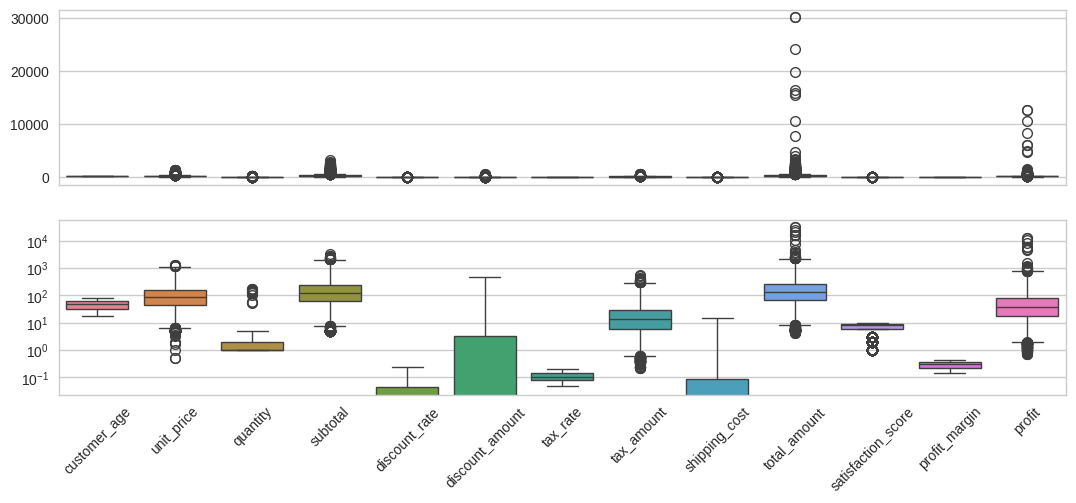


Columns with outliers


,Column,IQR_Outliers,IQR_Percentage,Z_Score_Outliers,Z_Score_Percentage
0,customer_age,0,0.000000,0,0.000000
1,unit_price,1208,9.966997,336,2.772277
2,quantity,705,5.816832,13,0.107261
3,subtotal,1147,9.463696,270,2.227723
4,discount_rate,1181,9.744224,226,1.864686
5,discount_amount,2159,17.813531,219,1.806931
6,tax_rate,0,0.000000,0,0.000000
7,tax_amount,1124,9.273927,248,2.046205
8,shipping_cost,3000,24.752475,357,2.945545
9,total_amount,1142,9.422442,44,0.363036


In [87]:
print("=== 4. OUTLIER DETECTION ===")

outlier_summary = []

for col in numerical_cols:
    if col in df.columns and df[col].dtype in ['int64', 'float64']:
        # IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()

        # Z-score method (threshold = 3)
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        z_outliers = (z_scores > 3).sum()

        outlier_summary.append({
            'Column': col,
            'IQR_Outliers': iqr_outliers,
            'IQR_Percentage': (iqr_outliers/len(df))*100,
            'Z_Score_Outliers': z_outliers,
            'Z_Score_Percentage': (z_outliers/len(df))*100
        })

outlier_df = pd.DataFrame(outlier_summary)

fig, axes = plt.subplots(2,1, sharex=True, figsize=(13,5))
sns.boxplot(df[numerical_cols], ax=axes[0])
plt.yscale("log")

sns.boxplot(df[numerical_cols], ax=axes[1])
plt.xticks(rotation=45)
plt.show()

print()
print("Columns with outliers")
outlier_df

#Visualizations

###I only made sales's visualizations because the main goal is optimize business's sales with machine learning models, then i will graph a lot of sales graphs where important variables influence the sales of this business

Sales vary on average between 0 and $10,000, but there are 7 occasions where sales exceed that average, this may be due to special days, discounts, trends, etc.

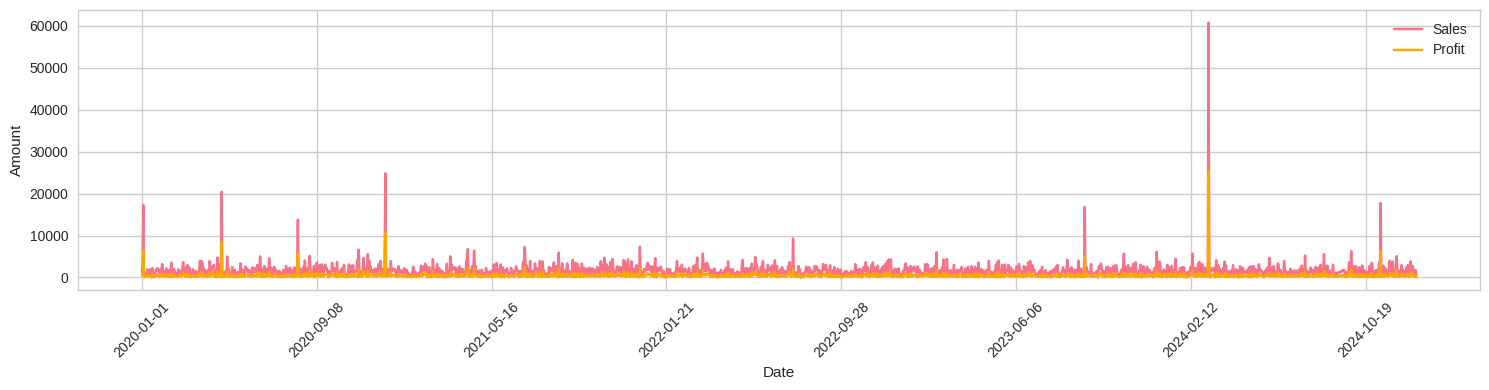

In [89]:
fig, ax = plt.subplots(figsize=(15, 4))
df_Sales_vs_Time = df.groupby("date")["total_amount"].sum()
df_Sales_vs_Time.plot(label="Sales")

profit_time = df.groupby('date')['profit'].sum()
profit_time.plot(color='orange', label="Profit")

plt.xlabel("Date")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

These graphs show sales behavior based on a variable e.g: customers, region, top 10, etc. Here, I compile the most important variables that influence a business's sales. Many hidden patterns can be detected, useful for business decision-making. Obviusly, it doesn't show all about the sales, i don't inlude graphs about payment methods, profit, etc. Because i think this analysis would become very saturated with information, but if necessary, it is possible.

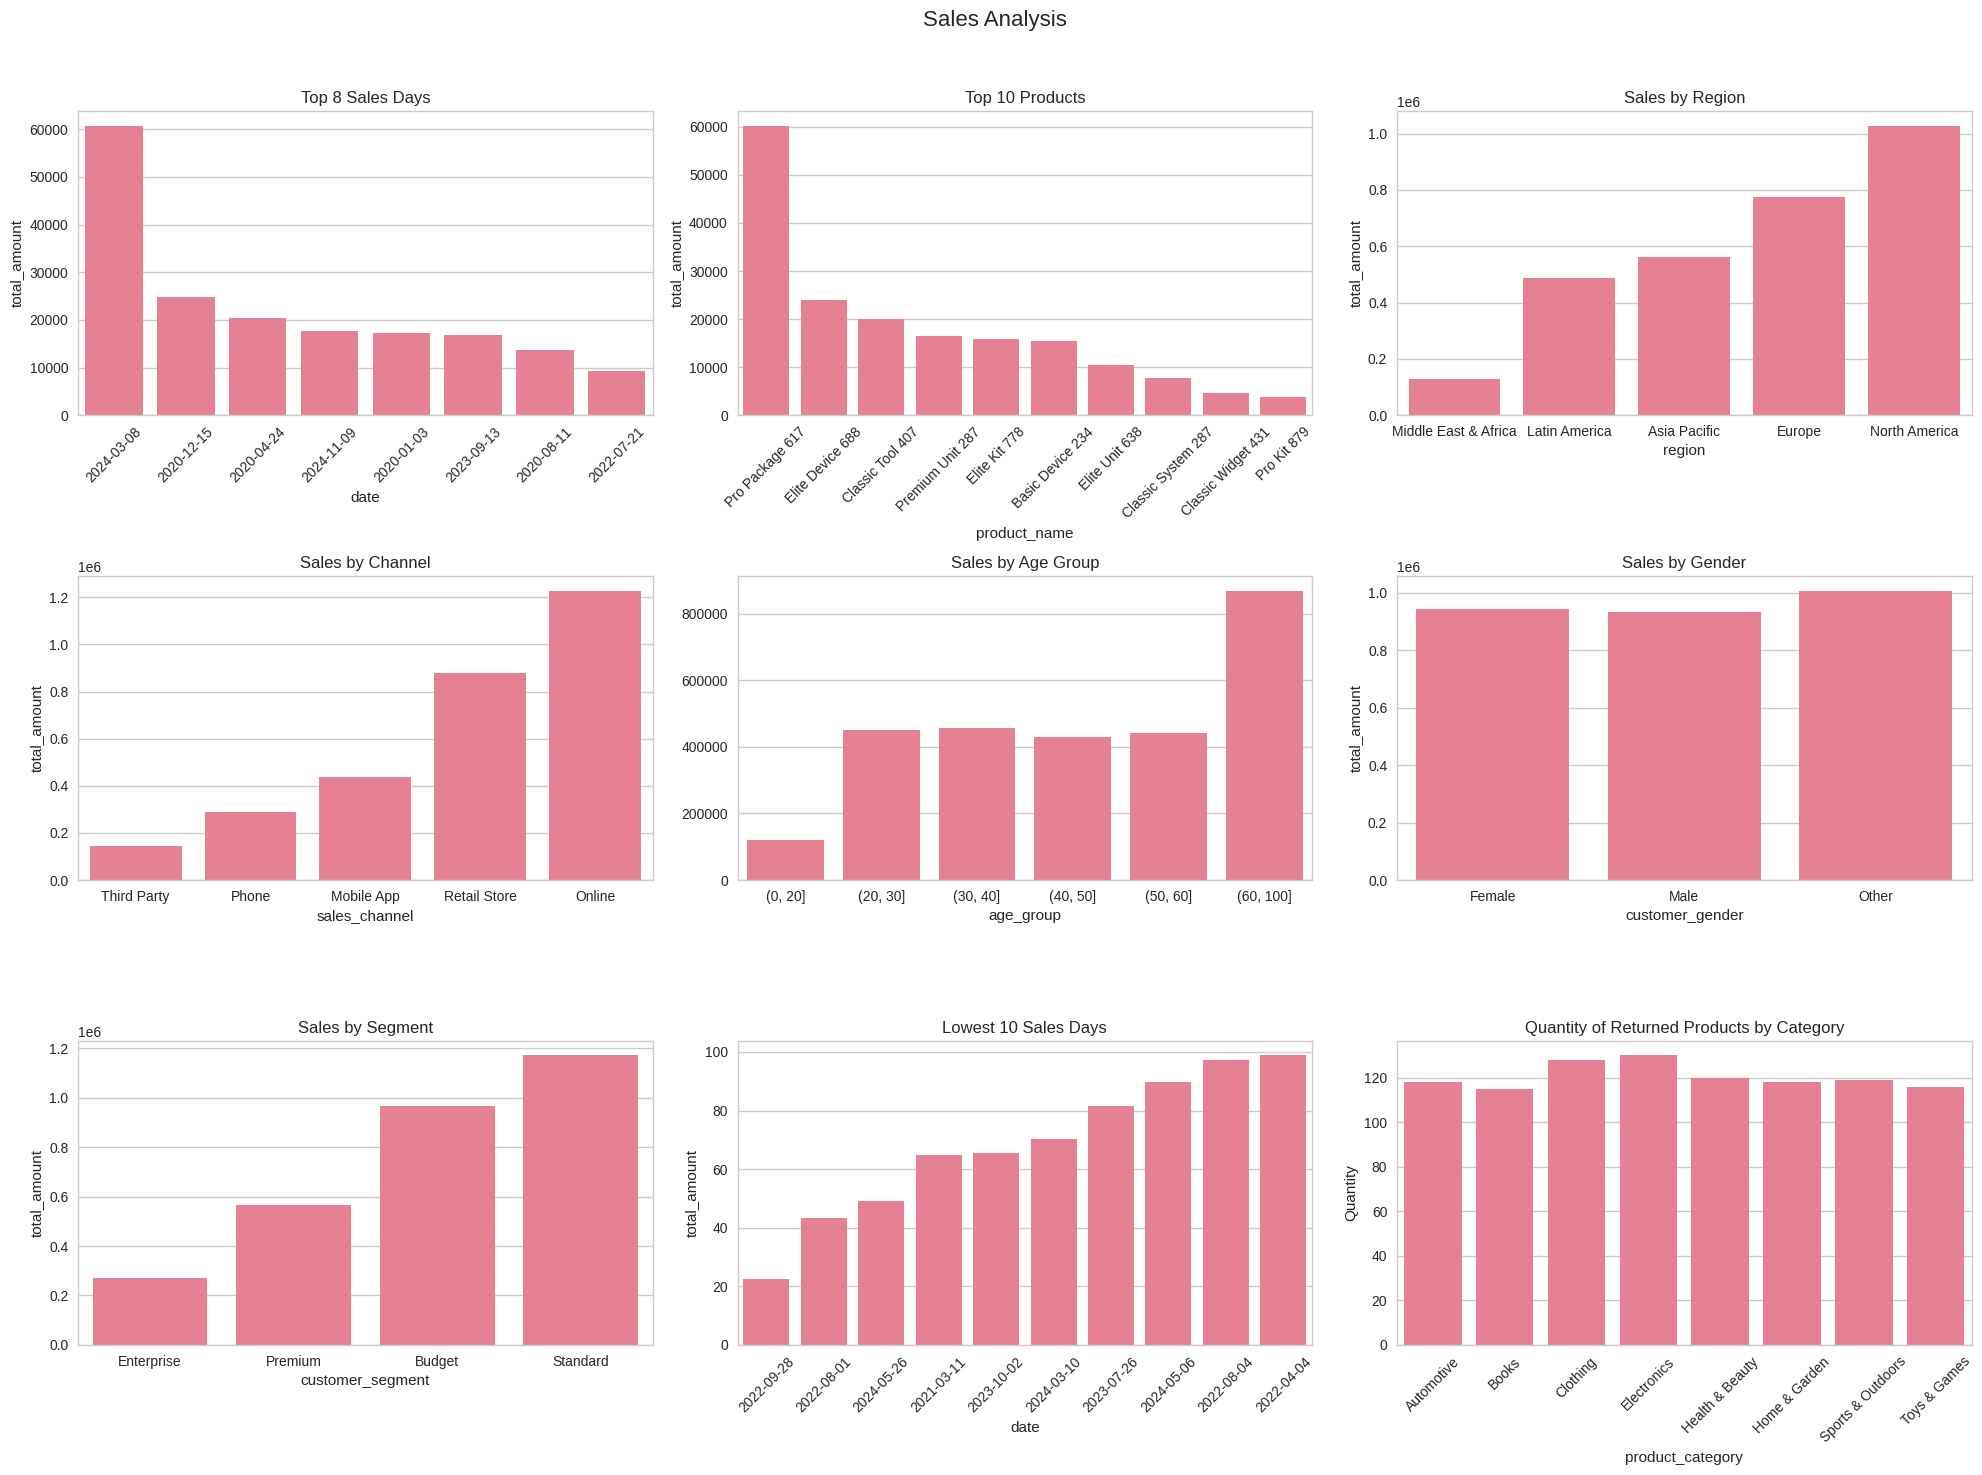

In [90]:
# @title
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle("Sales Analysis", fontsize=16)

# 🔝 Top 8 selling dates
top_dates = df_Sales_vs_Time.sort_values(ascending=False).head(8)
sns.barplot(top_dates, ax=axs[0, 0])
axs[0, 0].set_title("Top 8 Sales Days")
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45)

# 🔝 Top products
top_products = df.groupby('product_name')['total_amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(top_products, ax=axs[0, 1])
axs[0, 1].set_title("Top 10 Products")
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=45)

# 🧭 Sales by region
region_sales = df.groupby('region')['total_amount'].sum().sort_values()
sns.barplot(region_sales, ax=axs[0, 2])
axs[0, 2].set_title("Sales by Region")

# 🧭 Sales by channel
channel_sales = df.groupby('sales_channel')['total_amount'].sum().sort_values()
sns.barplot(channel_sales, ax=axs[1, 0])
axs[1, 0].set_title("Sales by Channel")

# Sales by age
age_bins = [0, 20, 30, 40, 50, 60, 100]
df['age_group'] = pd.cut(df['customer_age'], bins=age_bins)
age_sales = df.groupby('age_group')['total_amount'].sum()
sns.barplot(x=age_sales.index.astype(str), y=age_sales.values, ax=axs[1, 1])
axs[1, 1].set_title("Sales by Age Group")

# Sales by gender
gender_sales = df.groupby('customer_gender')['total_amount'].sum()
sns.barplot(gender_sales, ax=axs[1, 2])
axs[1, 2].set_title("Sales by Gender")

# Sales by customer segment
segment_sales = df.groupby('customer_segment')['total_amount'].sum().sort_values()
sns.barplot(segment_sales, ax=axs[2, 0])
axs[2, 0].set_title("Sales by Segment")

lowest_days = df_Sales_vs_Time.sort_values().head(10)
sns.barplot(lowest_days, ax=axs[2, 1])
axs[2, 1].set_title("Lowest 10 Sales Days")
axs[2, 1].set_xticklabels(axs[2, 1].get_xticklabels(), rotation=45)

return_rate = df[df['is_returned'] == True].groupby('product_category').size()
return_rate.dropna(inplace=True)
sns.barplot(return_rate, ax=axs[2, 2])
axs[2, 2].set_title("Quantity of Returned Products by Category")
axs[2, 2].set_xticklabels(axs[2, 2].get_xticklabels(), rotation=45)
axs[2, 2].set_ylabel("Quantity")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The column "return_reason" had ~11000 nan, it's strange. It can be seen that the biggest problems were with changes in opinions and errors in objects. It's important to discuss this with logistics

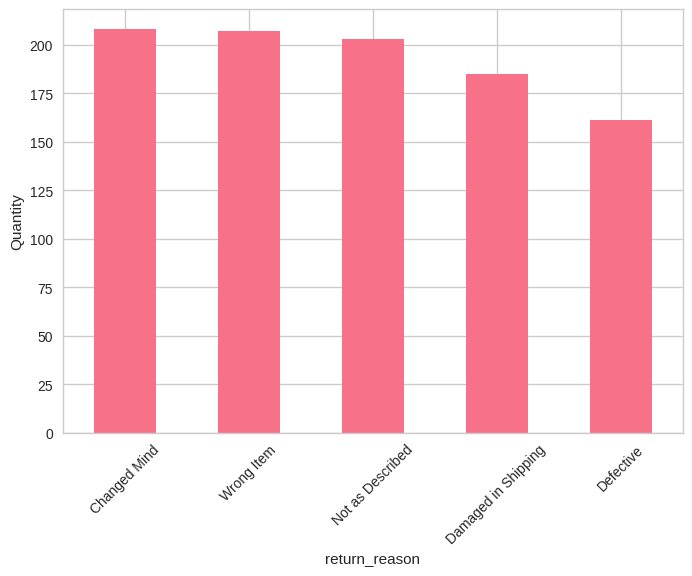

In [103]:
df.return_reason = df.return_reason.dropna()
df.return_reason.value_counts().plot(kind="bar")
plt.xticks(rotation=45)
plt.ylabel("Quantity")
plt.show()

The product's margin profit by category are the same for all, there isn't atypical profits. all margin profits find in the same range (0.15 - 0.45)

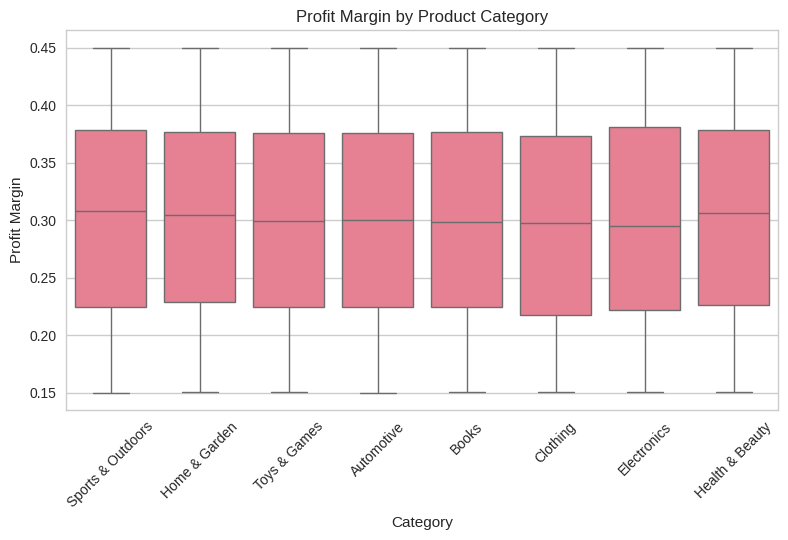

In [91]:
sns.boxplot(x='product_category', y='profit_margin', data=df)
plt.title("Profit Margin by Product Category")
plt.xlabel("Category")
plt.ylabel("Profit Margin")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

An important visualization to detect if there are products that sell a lot (total_amount) with a low profit margin or products that sell little but earn a lot of profit. We can detect a popular product, exist a product with 60000 of revenue and 25000 profit, is a popular product because normally the value total revenue is different to total profit, the revenue is the gross income and profit is the same but with subtracted costs

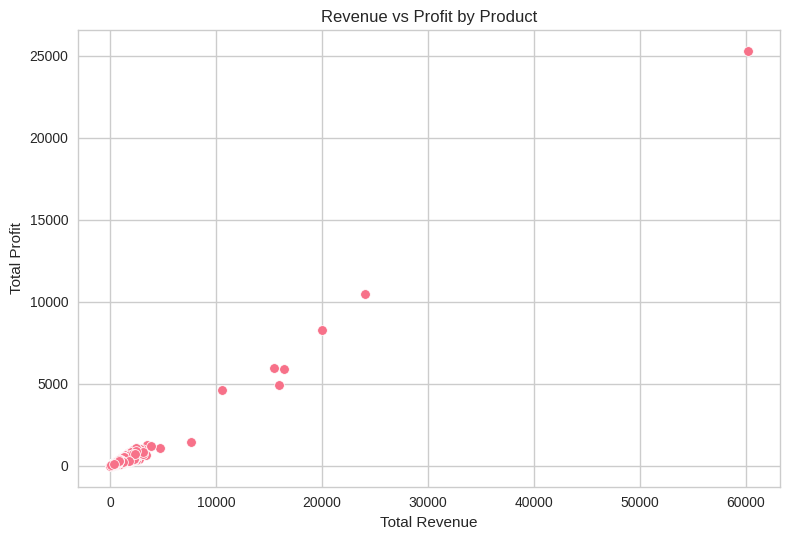

In [92]:
product_perf = df.groupby('product_name')[['total_amount', 'profit']].sum().reset_index()
sns.scatterplot(data=product_perf,x='total_amount',y='profit')
plt.title("Revenue vs Profit by Product")
plt.xlabel("Total Revenue")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

Applying the filter (2024-2025) because there is a lot of data, we can see what cost is the most expensive for the business. I consider 3 costs but this can be modified and more business costs can be added

*   sub_total = unit_price * quantity, the merchandise that the business buys to later sell

*   tax_amount = sub_total * tax_rate, the taxes that are collected to then pay to the government

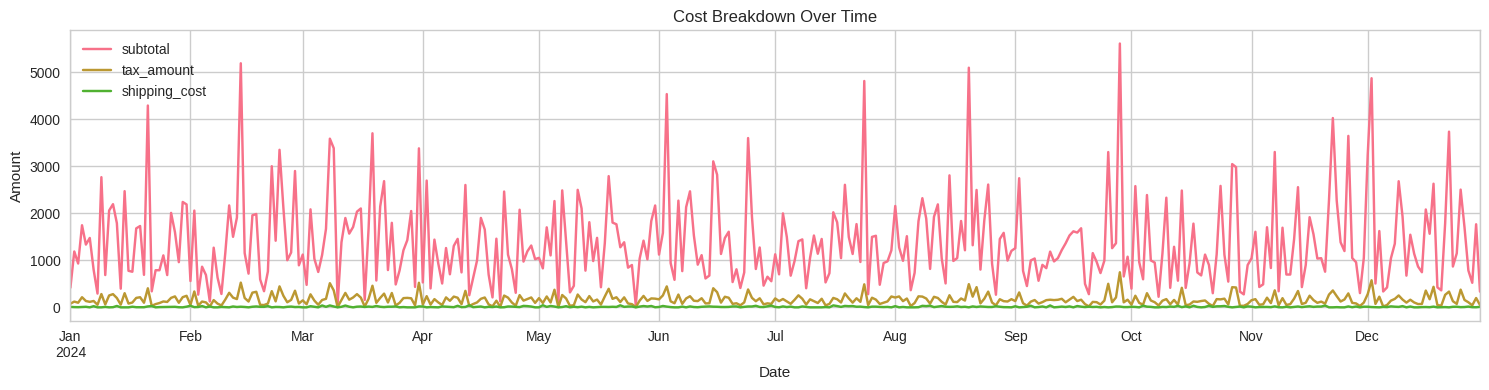

In [94]:
df.date = pd.to_datetime(df.date)
cost_breakdown = df[df["date"].dt.year > 2023]
cost_breakdown.groupby('date')[['subtotal', 'tax_amount', 'shipping_cost']].sum().plot(figsize=(15,4))

plt.title("Cost Breakdown Over Time")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()

I decided do a correlation heatmap for know a general idea about the business's correlation data

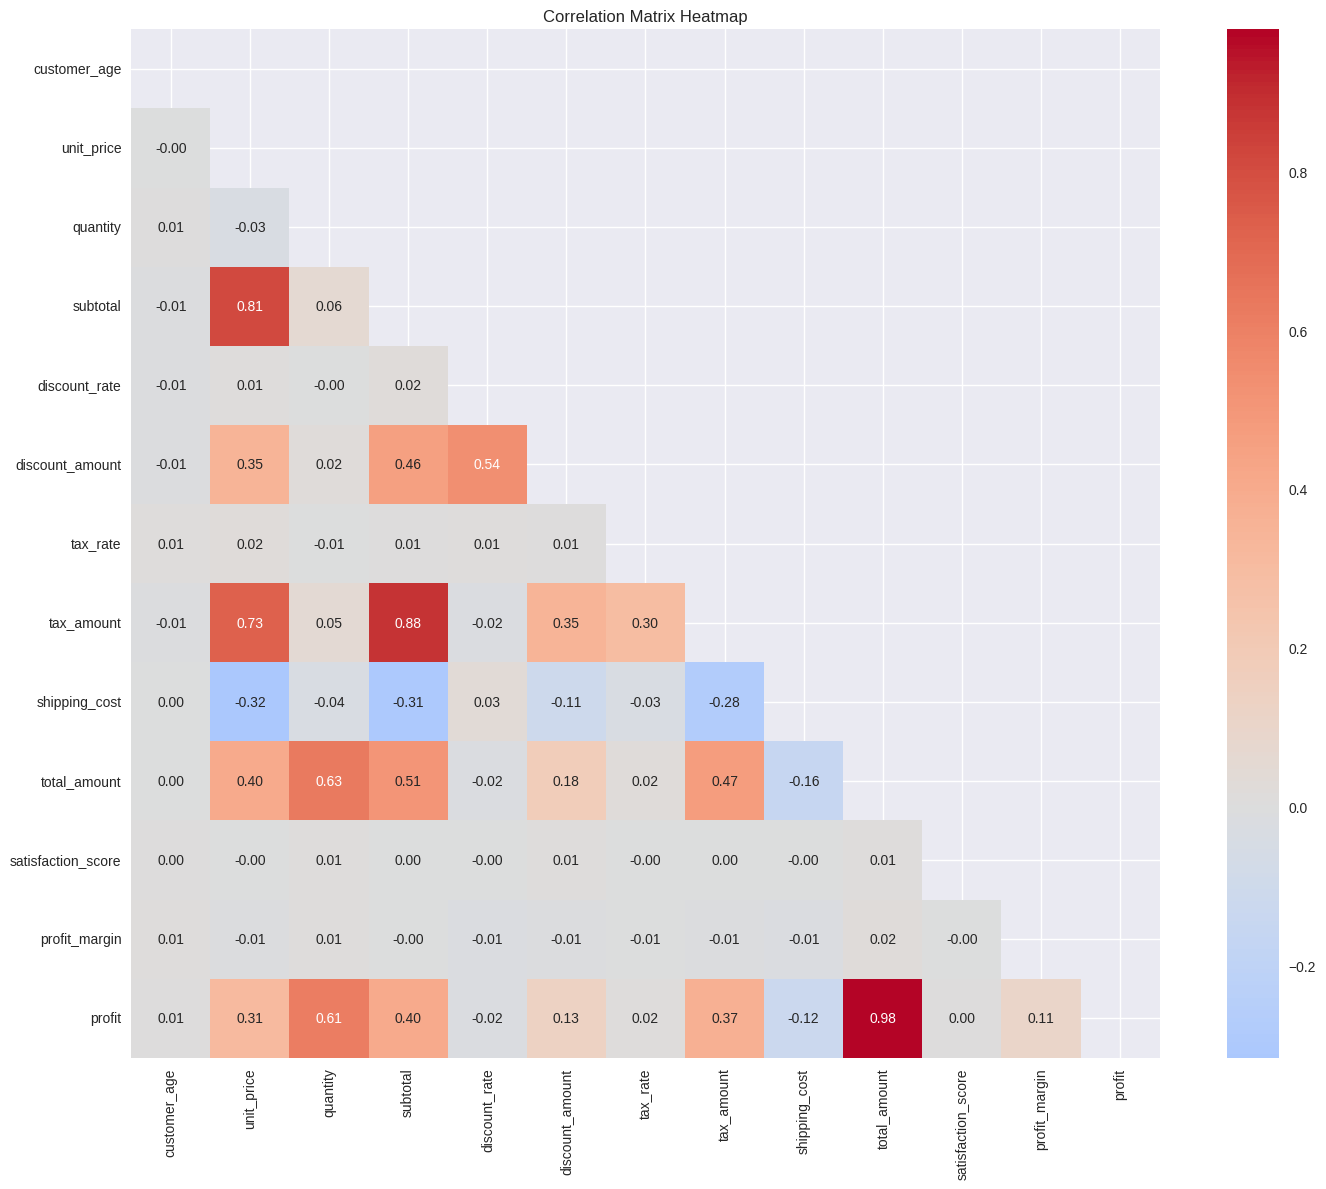

In [105]:
plt.style.use('seaborn-v0_8')

# 3. Correlation heatmap
plt.figure(figsize=(15, 12))
numeric_df = df[numerical_cols]
correlation_matrix = numeric_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

Finally in the visualizations, i thinked that is a good idea to give importance to the categorical variables. It can be useful for the ML models

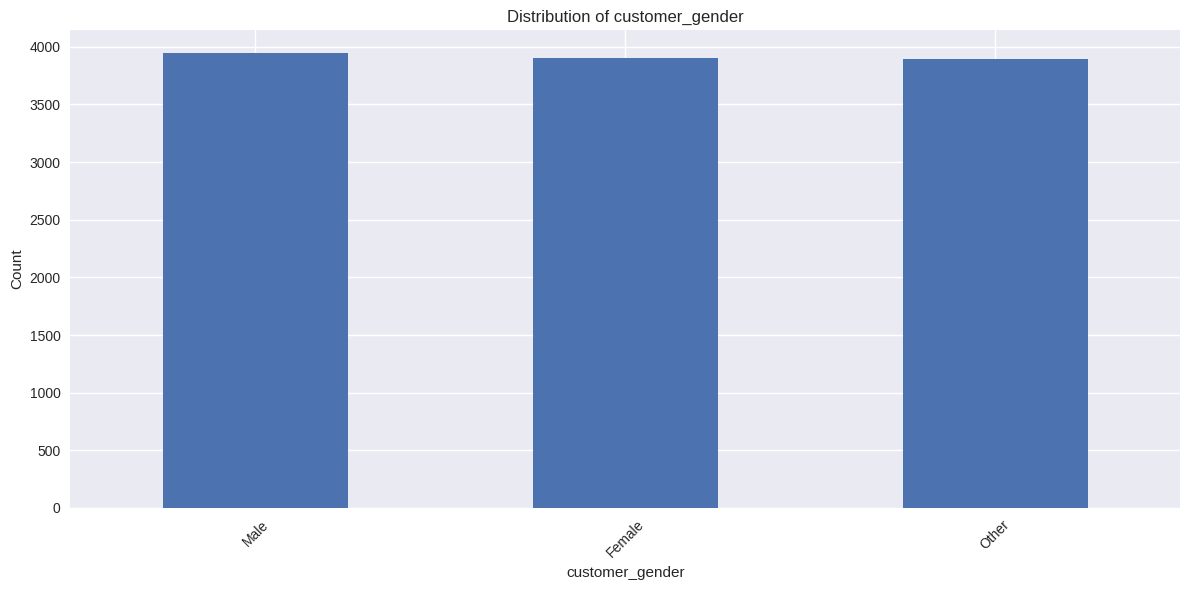

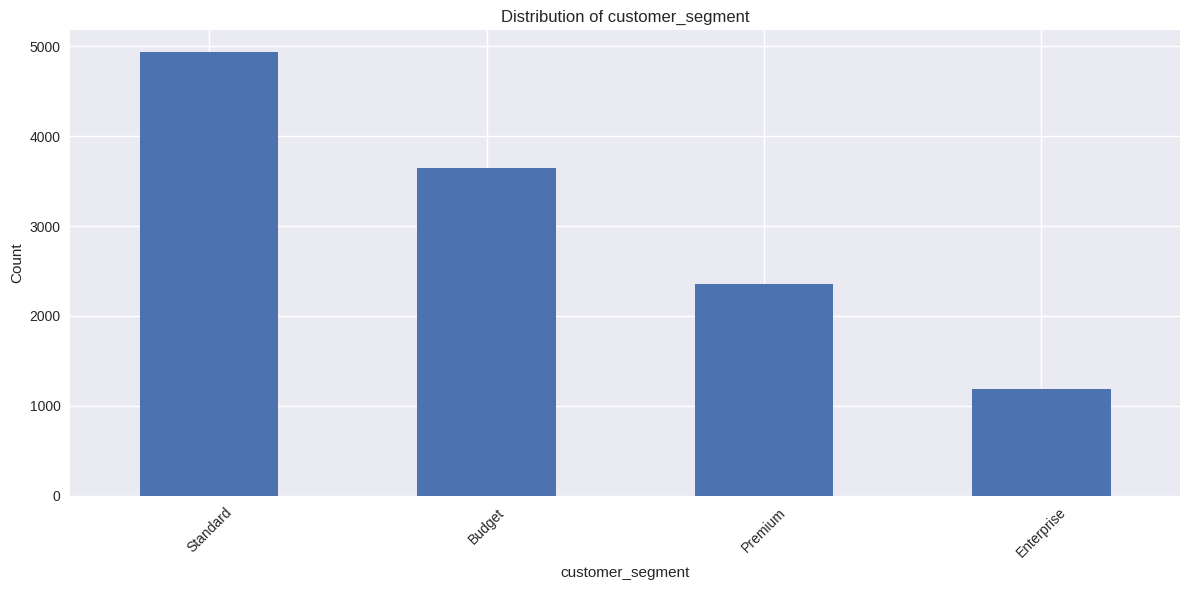

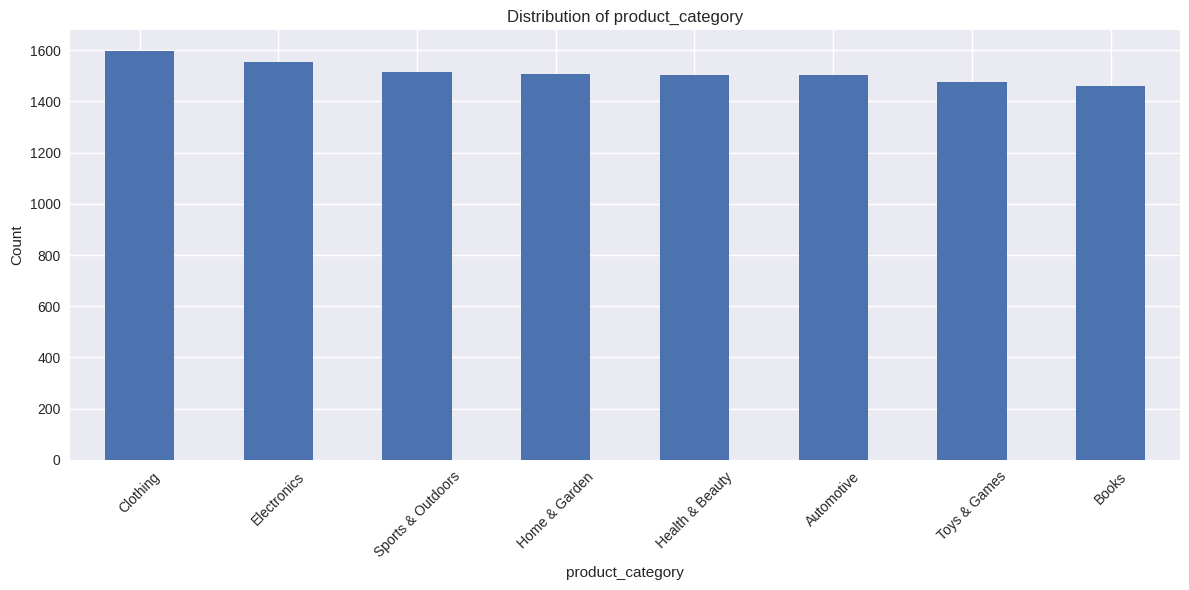

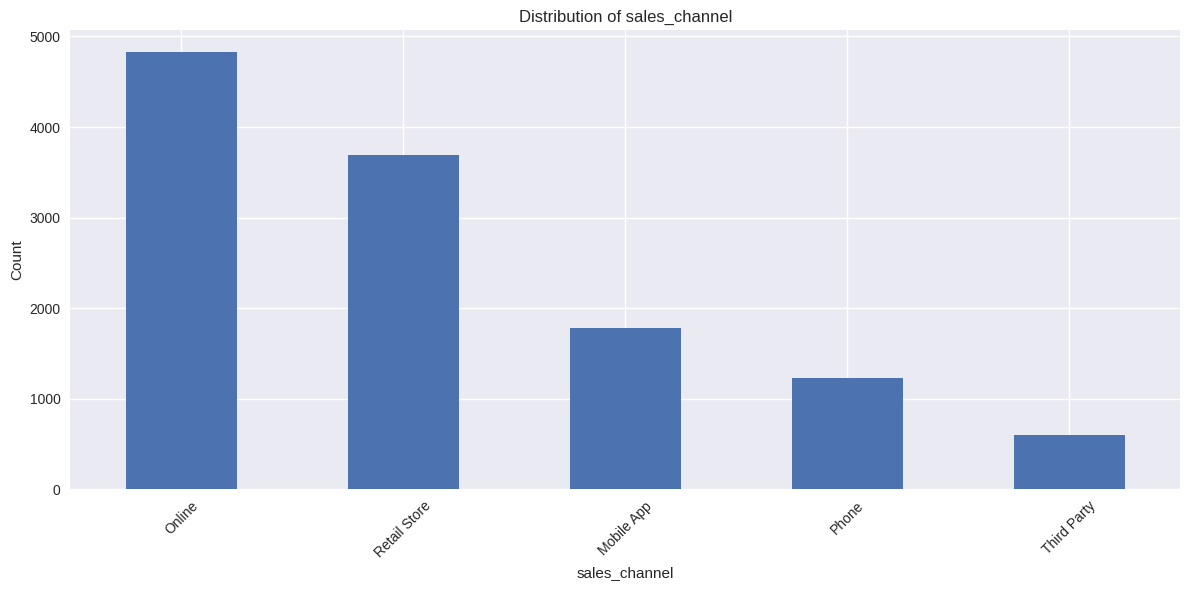

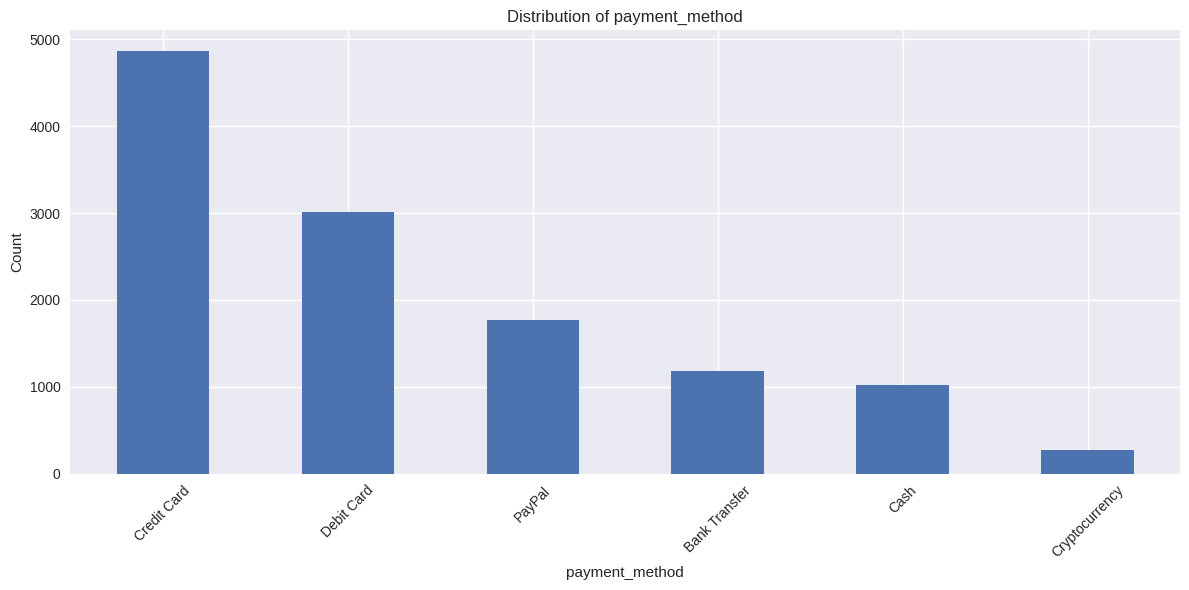

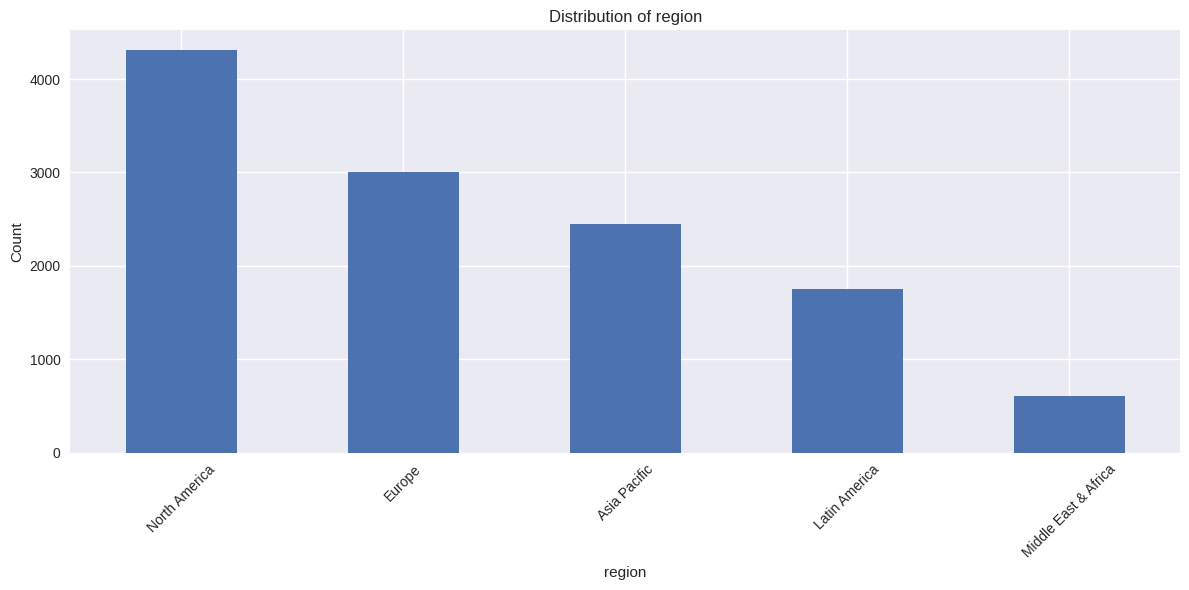

In [106]:
# 4. Categorical variables visualization
for col in categorical_cols[:6]:
    if col in df.columns:
        plt.figure(figsize=(12, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Bussines Insigths

In [107]:
df.columns

Index(['order_id', 'date', 'customer_id', 'customer_age', 'customer_gender',
       'customer_segment', 'product_category', 'product_name', 'unit_price',
       'quantity', 'subtotal', 'discount_rate', 'discount_amount', 'tax_rate',
       'tax_amount', 'shipping_cost', 'total_amount', 'sales_channel',
       'payment_method', 'region', 'sales_rep', 'lead_source', 'is_returned',
       'return_reason', 'satisfaction_score', 'year', 'month', 'quarter',
       'day_of_week', 'is_weekend', 'profit_margin', 'profit', 'age_group'],
      dtype='object')

In [ ]:
# Sales performance
print(f"Total Revenue: ${df['total_amount'].sum():,.2f}")
print(f"EBITDA: ${(df['total_amount'] - df['shipping_cost'] - df['discount_amount'])}")
print(f"Average Order Price: ${df['total_amount'].mean():.2f}")
print(f"Total Orders: {df['order_id'].nunique():,}")
print(f"Total Customers: {df['customer_id'].nunique():,}")
print(f"Average Customer Age: {np.floor(df['customer_age'].mean())}")

In [115]:
# Percentage of how many orders were returned out of the 12,000 total orders
return_rate = (df['is_returned'].sum() / len(df)) * 100
print(f"Return Rate: {return_rate:.2f}%")

Return Rate: 7.95%


In [ ]:
# Profitability analysis
print(f"Total Profit: ${df['profit'].sum():,.2f}")
print(f"Average Profit Margin: {df['profit_margin'].mean():.2f}%")
print(f"Profit per Order: ${df['profit'].mean():.2f}")

In [117]:
# Channel performance
channel_performance = df.groupby('sales_channel').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'profit': 'sum'
}).round(2)
channel_performance

total_amount                   profit
                       sum    mean count        sum
sales_channel                                      
Mobile App       437076.26  245.96  1777  132687.51
Online          1228437.55  254.55  4826  378735.46
Phone            287337.62  233.80  1229   85016.07
Retail Store     878693.15  238.26  3688  268609.08
Third Party      146040.17  243.40   600   43227.82

In [118]:
# Customer segmentation analysis
segment_analysis = df.groupby('customer_segment').agg({
    'total_amount': ['sum', 'mean'],
    'profit': 'sum',
    'satisfaction_score': 'mean'
}).round(2)
segment_analysis

total_amount             profit satisfaction_score
                          sum    mean        sum               mean
customer_segment                                                   
Budget              968860.95  265.44  304132.35               7.46
Enterprise          270909.83  229.00   80639.41               7.52
Premium             566251.20  240.24  167572.86               7.46
Standard           1171562.77  237.64  355931.31               7.49